Purpose is to check if a regression model can learn different types of transformations (affine, sinusoidal).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor

In [12]:
# Create input grid to be distorted

res = 0.1
scl = 3
x, y = np.arange(-scl, scl, res), np.arange(-scl, scl, res)
do_fit = True
xx, yy = np.meshgrid(x, y, sparse=False)
X_in = np.vstack([xx.flatten(),yy.flatten()]).transpose()

In [13]:
# Define two distortion functions that will distort the input grid

def affine_transform(X_in, A=None):
    '''applies the affine transformation specified by A to X_in'''
    if A is None:
        A = np.identity(2)
    assert X_in.shape[1] == A.shape[0]
    return np.matmul(A,X_in.transpose()).transpose()

def distort(X_in):
    '''applies a sinusoidal distortion to the input data'''
    X_out = np.zeros_like(X_in)
    scale = 1
    for i in range(X_in.shape[0]):
        X_out[i,0] = X_in[i,0]+np.cos(X_in[i,1])*np.cos(X_in[i,0])*scale
        X_out[i,1] = X_in[i,1]+np.sin(X_in[i,1])*np.sin(X_in[i,0])*scale
    return X_out

In [14]:
# Apply the distortion to the input grid

A = np.array([[1,-0.3],
              [-0.3,1]])
X_out = affine_transform(X_in, A)
X_out = distort(X_in)

In [9]:
# Fit a regression model to the distortion & evaluate

if do_fit:
    model = MLPRegressor

    regx = model()
    regx.fit(X_in,X_out[:,0])
    predx = regx.predict(X_in)
    print(f"X_score is {regx.score(X_in,X_out[:,0])}")

    regy = model()
    regy.fit(X_in,X_out[:,1])
    predy = regy.predict(X_in)
    print(f"X_score is {regy.score(X_in,X_out[:,1])}")

    pred = np.vstack([predx,predy]).transpose()

X_score is 0.9990823584838954
X_score is 0.9990147078214094


0
1


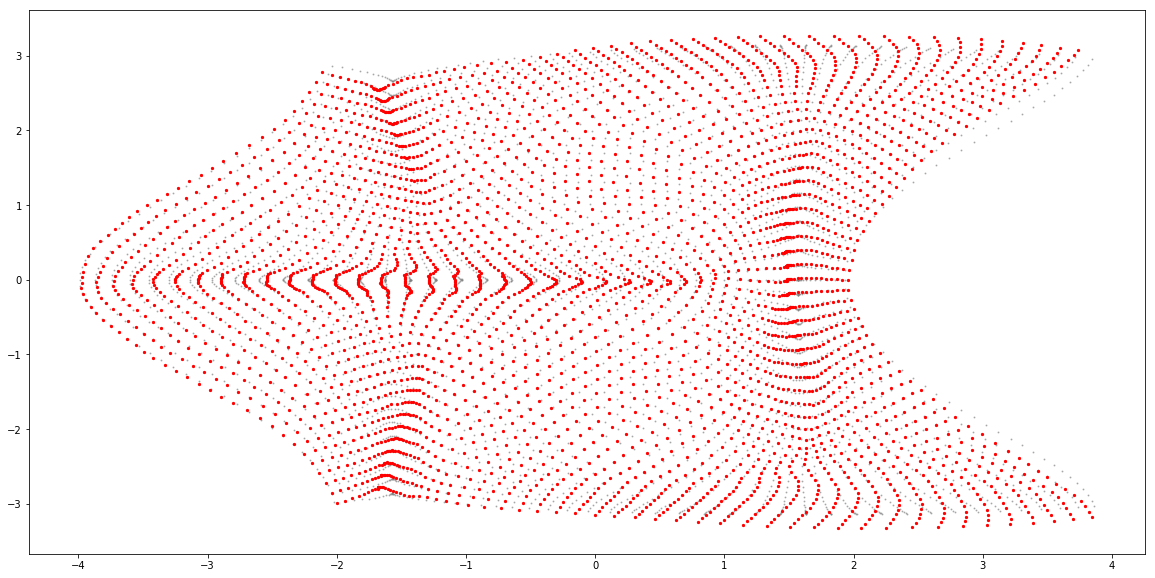

In [10]:
# Plot

plt.rcParams["figure.figsize"] = (20,10)
fix, ax = plt.subplots(1,1)
#ax.scatter(X_in[:,0], X_in[:,1], s=1, alpha=0.5)
ax.scatter(X_out[:,0], X_out[:,1], s=1, color='gray', alpha=0.5)

if do_fit:
    ax.scatter(pred[:,0], pred[:,1], s=5, color='red')
    for ix in range(pred.shape[1]):
        print(ix)